In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data_encoded.csv')

In [34]:
X = df.drop('overall_rating', axis=1)
y = df['overall_rating']

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42)

# Minkowski Distance (p = 2)

In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsRegressor(n_neighbors=5, p=2)
knn.fit(X_train_scaled, y_train)

KNeighborsRegressor()

In [51]:
y_pred = knn.predict(X_test_scaled)
y_train_pred = knn.predict(X_train_scaled)

In [52]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print('Training Set:')
print('MAE:', mean_absolute_error(y_train, y_train_pred))
print('MSE:', mean_squared_error(y_train, y_train_pred))
print('R2 score:', r2_score(y_train, y_train_pred))

print()

print('Test Set:')
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('R2 score:', r2_score(y_test, y_pred))

Training Set:
MAE: 1.2656636576395854
MSE: 2.67358074222668
R2 score: 0.9450990324123522

Test Set:
MAE: 1.4973424703326095
MSE: 3.8302724385759648
R2 score: 0.9193593395771321


# Minkowski Distance (p = 1, weights = "uniform")

In [72]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsRegressor(n_neighbors=5, p=1)
knn.fit(X_train_scaled, y_train)

KNeighborsRegressor(p=1)

In [73]:
y_pred = knn.predict(X_test_scaled)
y_train_pred = knn.predict(X_train_scaled)

In [74]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print('Training Set:')
print('MAE:', mean_absolute_error(y_train, y_train_pred))
print('MSE:', mean_squared_error(y_train, y_train_pred))
print('R2 score:', r2_score(y_train, y_train_pred))

print()

print('Test Set:')
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('R2 score:', r2_score(y_test, y_pred))

Training Set:
MAE: 0.9946004680708795
MSE: 1.6926813774657306
R2 score: 0.9652414292290776

Test Set:
MAE: 1.1760655189704163
MSE: 2.4404613070366037
R2 score: 0.948619735360377


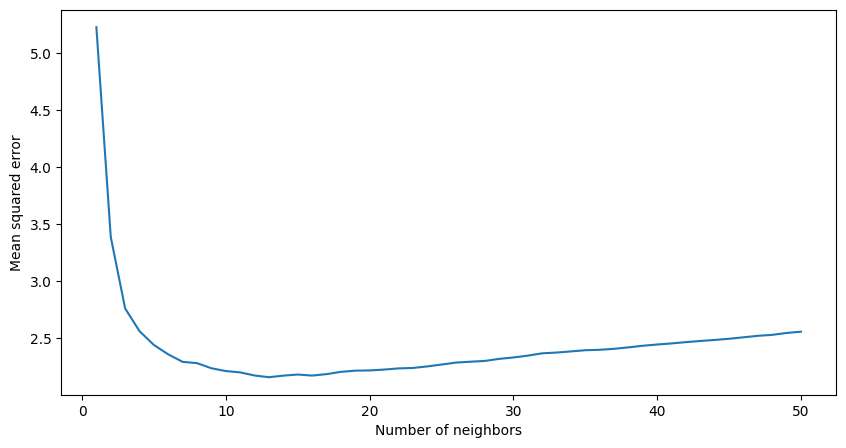

In [75]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

losses = []
min_loss = float('inf')
min_k = 0

for i in range(1, 51):
    pipe = Pipeline([('scaler', StandardScaler()), 
                     ('knn', KNeighborsRegressor(n_neighbors=i, p=1))])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    loss = np.mean((y_pred - y_test)**2)
    if loss < min_loss:
        min_loss = loss
        min_k = i
    losses.append(loss)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 51), losses)
plt.xlabel('Number of neighbors')
plt.ylabel('Mean squared error')
plt.show()

In [76]:
print('Best k:', min_k)
print('Minimum loss:', min_loss)

Best k: 13
Minimum loss: 2.1576715882376796


In [77]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsRegressor(n_neighbors=min_k, p=1))
])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
y_train_pred = pipeline.predict(X_train)

In [78]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print('Training Set:')
print('MAE:', mean_absolute_error(y_train, y_train_pred))
print('MSE:', mean_squared_error(y_train, y_train_pred))
print('R2 score:', r2_score(y_train, y_train_pred))

print()

print('Test Set:')
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('R2 score:', r2_score(y_test, y_pred))

Training Set:
MAE: 1.0338386955739014
MSE: 1.8903797190387732
R2 score: 0.9611817686879137

Test Set:
MAE: 1.093791383278263
MSE: 2.1576715882376796
R2 score: 0.9545734501549363


In [43]:
X.shape

(17947, 58)

In [44]:
y.shape

(17947,)

In [79]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(pipeline, X, y, cv=10, scoring='neg_mean_absolute_error')
print('Cross-validation mean absolute error:', -scores.mean())

Cross-validation mean absolute error: 1.0839197247974883


In [80]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

cv = 5

r2_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='r2', n_jobs=-1)
print(f"R^2 scores cho {cv}-fold cross-validation: {r2_scores}")
print(f"R^2 trung bình: {r2_scores.mean():.3f} ± {r2_scores.std():.3f}")
print()

mse_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='neg_mean_squared_error', n_jobs=-1)
mse_scores = -mse_scores
print(f"MSE cho {cv}-fold cross-validation: {mse_scores}")
print(f"MSE trung bình: {mse_scores.mean():.3f}" + u"\u00B1" + f" {mse_scores.std():.3f}")
print()

mae_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='neg_mean_absolute_error', n_jobs=-1)
mae_scores = -mae_scores
print(f"MAE cho {cv}-fold cross-validation: {mae_scores}")
print(f"MAE trung bình: {mae_scores.mean():.3f} ± {mae_scores.std():.3f}")

R^2 scores cho 5-fold cross-validation: [0.9590565  0.95797239 0.95198627 0.95559233 0.95338317]
R^2 trung bình: 0.956 ± 0.003

MSE cho 5-fold cross-validation: [2.00717476 1.99022103 2.33395764 2.20429452 2.18089626]
MSE trung bình: 2.143± 0.129

MAE cho 5-fold cross-validation: [1.06370259 1.0669595  1.12598324 1.11093727 1.09932057]
MAE trung bình: 1.093 ± 0.024


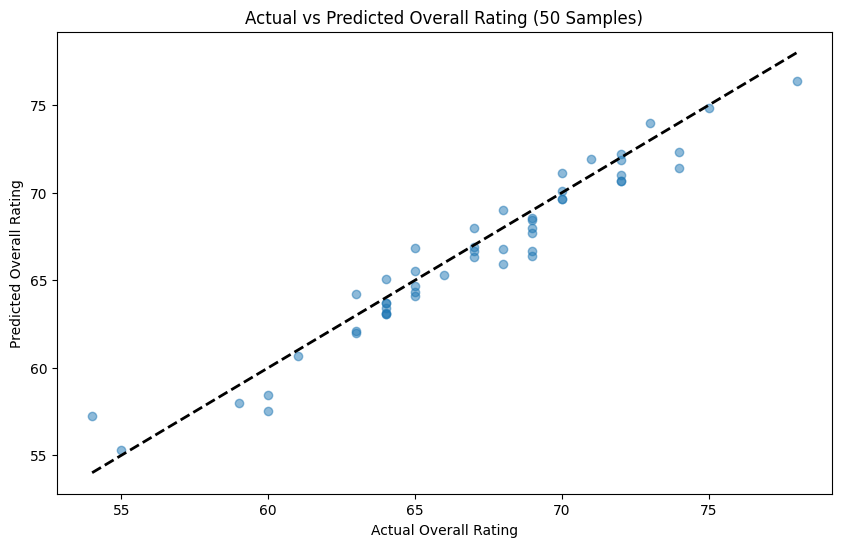

In [81]:
import matplotlib.pyplot as plt

# Select 20 samples
y_test_sample = y_test[:50]
y_pred_sample = y_pred[:50]

plt.figure(figsize=(10, 6))
plt.scatter(y_test_sample, y_pred_sample, alpha=0.5)
plt.plot([y_test_sample.min(), y_test_sample.max()], [y_test_sample.min(), y_test_sample.max()], 'k--', lw=2)
plt.xlabel('Actual Overall Rating')
plt.ylabel('Predicted Overall Rating')
plt.title('Actual vs Predicted Overall Rating (50 Samples)')
plt.show()

In [64]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, y, cv=5, scoring="neg_mean_squared_error"):
    # Sử dụng learning_curve để tính toán điểm huấn luyện và kiểm tra cho các kích thước tập huấn luyện khác nhau
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, scoring=scoring, train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
    )

    # Tính toán trung bình và độ lệch chuẩn của các điểm số
    train_scores_mean = -np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = -np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Vẽ biểu đồ
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color="blue", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="green", label="Cross-validation score")

    # Tô bóng cho độ lệch chuẩn
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, color="blue", alpha=0.1)
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, color="green", alpha=0.1)

    # Đặt tên cho trục và tiêu đề
    plt.xlabel("Training examples")
    plt.ylabel("MSE")
    plt.title("Learning Curve for KNN Regressor")
    plt.legend(loc="best")
    plt.grid()
    plt.show()


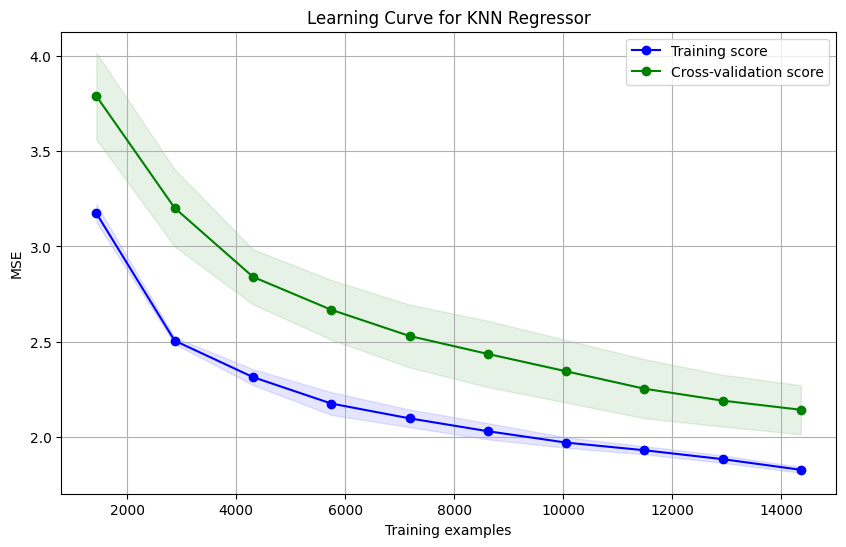

In [71]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

pipeline = Pipeline([('scaler', StandardScaler()), 
                     ('knn', KNeighborsRegressor(n_neighbors=min_k, p=1))])

plot_learning_curve(pipeline, X, y, cv=5)

In [82]:
df = pd.read_csv('data_encoded.csv')

In [83]:
X = df.drop('overall_rating', axis=1)
y = df['overall_rating']

In [97]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)

In [92]:
X_train

array([[24, 165.1, 53.1, ..., 0, 0, 60.4681818301328],
       [27, 172.72, 68.0, ..., 0, 0, 63.67591763652641],
       [30, 185.42, 79.8, ..., 0, 0, 59.25631768957903],
       ...,
       [25, 175.26, 54.9, ..., 0, 1, 65.15671641791045],
       [21, 172.72, 63.0, ..., 0, 0, 64.19565217548319],
       [25, 182.88, 79.8, ..., 0, 0, 68.1666662770088]], dtype=object)

In [98]:
import numpy as np
from sklearn.metrics import pairwise_distances
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
# Hàm tính độ hợp lệ (Validity) với ma trận khoảng cách sẵn có
def compute_validity_regression(X_train, y_train, H=5):
    # Tính toán ma trận khoảng cách giữa các điểm trong X_train
    distances = pairwise_distances(X_train)
    
    # Khởi tạo mảng validity
    validity = np.zeros(len(X_train))
    
    for i in range(len(X_train)):
        # Lấy H láng giềng gần nhất (bỏ qua chính điểm đó)
        nearest_neighbors = np.argpartition(distances[i], H+1)[:H+1]
        nearest_neighbors = nearest_neighbors[nearest_neighbors != i]  # Loại bỏ chính nó

        # Tính độ lệch chuẩn của giá trị mục tiêu của láng giềng
        neighbor_targets = y_train[nearest_neighbors]
        validity[i] = 1 / (np.std(neighbor_targets) + 0.1)  # Độ hợp lệ nghịch đảo với độ lệch chuẩn
    
    return validity

# Hàm dự đoán với Weighted KNN cho hồi quy
def weighted_knn_predict_regression(X_train, y_train, X_test, validity, K=5):
    # Tính toán ma trận khoảng cách giữa X_test và X_train
    distances = pairwise_distances(X_test, X_train)
    
    y_pred = []
    
    for i in range(len(X_test)):
        # Lấy K láng giềng gần nhất
        nearest_neighbors = np.argpartition(distances[i], K)[:K]
        
        # Tính trọng số dựa trên độ hợp lệ và khoảng cách
        d = distances[i][nearest_neighbors]
        weights = validity[nearest_neighbors] / (d + 0.5)
        weighted_average = np.dot(weights, y_train[nearest_neighbors]) / weights.sum()
        
        y_pred.append(weighted_average)
    
    return np.array(y_pred)

# Tính độ hợp lệ cho các mẫu trong tập huấn luyện
validity = compute_validity_regression(X_train, y_train, H=5)

# Dự đoán cho các mẫu trong tập kiểm tra
y_pred = weighted_knn_predict_regression(X_train, y_train, X_test, validity, K=5)

In [96]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [102]:
min_loss = float('inf')
H_optimal = 0

for H in range(1, 21):
    validity = compute_validity_regression(X_train, y_train, H=H)
    y_pred = weighted_knn_predict_regression(X_train, y_train, X_test, validity, K=H)
    if mean_squared_error(y_test, y_pred) < min_loss:
        min_loss = mean_squared_error(y_test, y_pred)
        H_optimal = H

print(H_optimal)

10


In [103]:
validity = compute_validity_regression(X_train, y_train, H=10)

# Dự đoán cho các mẫu trong tập kiểm tra
y_pred = weighted_knn_predict_regression(X_train, y_train, X_test, validity, K=10)

In [104]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# print('Training Set:')
# print('MAE:', mean_absolute_error(y_train, y_train_pred))
# print('MSE:', mean_squared_error(y_train, y_train_pred))
# print('R2 score:', r2_score(y_train, y_train_pred))

print()

print('Test Set:')
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('R2 score:', r2_score(y_test, y_pred))


Test Set:
MAE: 1.4606106312754015
MSE: 3.6665733559784646
R2 score: 0.9228057790518625
